# Logistic Regression Model

### Imports

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from typing import List, Dict, Tuple
import ast  # Abstract Syntax Tree module 

from sklearn.model_selection import train_test_split

### TFIDF Class and Stop Word Removal Function

In [ ]:

# NOTE: Key TF-IDF parameters to configure:
# 
# 1. max_df (Maximum Document Frequency): Excludes terms that appear in a high percentage of documents 
#    (e.g., common stop words). Example: max_df=0.95 filters out terms in 95% or more of the documents.
# 
# 2. min_df (Minimum Document Frequency): Excludes terms that appear in very few documents. 
#    Example: min_df=2 keeps terms that occur in at least 2 documents.
# 
# 3. ngram_range: Defines the size of word combinations (n-grams) to consider. 
#    Example: ngram_range=(1, 2) includes unigrams (single words) and bigrams (two consecutive words).
# 
# These parameters allow you to control the features extracted during vectorization. Adjust them based 
# on your dataset to balance dimensionality and model performance.

class CustomTFIDF:
    def __init__(self, min_df: int = 2, max_df: float = 0.95, ngram_range: Tuple[int, int] = (1, 2)):
        self.min_df = min_df
        self.max_df = max_df
        self.ngram_range = ngram_range
        self.vocabulary_ = {}
        self.idf_ = None
        self.document_count = 0
        self.feature_names_ = []


    def _create_ngrams(self, text: str) -> List[str]:
        words = text.split()
        ngrams = []
        for n in range(self.ngram_range[0], self.ngram_range[1] + 1):
            for i in range(len(words) - n + 1):
                ngrams.append(" ".join(words[i:i + n]))
        return ngrams


    def _build_vocabulary(self, texts: List[str]):
        # Count document frequency for each term
        doc_frequency = Counter()
        for text in texts:
            unique_terms = set(self._create_ngrams(text))
            for term in unique_terms:
                doc_frequency[term] += 1

        # Filter terms based on document frequency
        valid_terms = [
            term for term, freq in doc_frequency.items()
            if freq >= self.min_df and freq/self.document_count <= self.max_df
        ]

        # Create vocabulary mapping
        self.vocabulary_ = {term: idx for idx, term in enumerate(sorted(valid_terms))}
        self.feature_names_ = sorted(valid_terms)

    def _calculate_idf(self, texts: List[str]):
        df = np.zeros(len(self.vocabulary_))
        for text in texts:
            unique_terms = set(self._create_ngrams(text))
            for term in unique_terms:
                if term in self.vocabulary_:
                    df[self.vocabulary_[term]] += 1

        # Calculate IDF
        self.idf_ = np.log((self.document_count + 1) / (df + 1)) + 1

    def fit_transform(self, texts: List[str]) -> np.ndarray:
        self.document_count = len(texts)
        self._build_vocabulary(texts)
        self._calculate_idf(texts)
        return self.transform(texts)

    def transform(self, texts: List[str]) -> np.ndarray:
        X = np.zeros((len(texts), len(self.vocabulary_)))
        
        for i, text in enumerate(texts):
            term_freq = Counter(self._create_ngrams(text))
            for term, freq in term_freq.items():
                if term in self.vocabulary_:
                    idx = self.vocabulary_[term]
                    X[i, idx] = freq

        # Calculate TF-IDF
        X = X * self.idf_
        
        # Normalize each document vector
        norms = np.sqrt((X ** 2).sum(axis=1))
        norms[norms == 0] = 1
        X = X / norms[:, np.newaxis]
        
        return X

    def get_feature_names_out(self) -> List[str]:
        return self.feature_names_



############stop word removal################

def remove_stopwords(df, column_name, stopwords_file):
    """
    Removes stop words from a DataFrame column containing lists of words and keeps track of the total number of removed words.

    Parameters:
        df (pd.DataFrame): The DataFrame with the target column.
        column_name (str): The name of the column with lists of words.
        stopwords_file (str): Path to the file containing stop words.

    Returns:
        pd.DataFrame: The DataFrame with the stop words removed from the specified column.
    """
    # Load stop words from file
    with open(stopwords_file, 'r', encoding='utf-8') as f:
        stopwords = set(line.strip() for line in f if line.strip())

    # Initialize the counter for total removed words
    total_removed_count = 0

    # Remove stop words and count the total removed
    def process_row(words):
        nonlocal total_removed_count
        original_words = set(words)  # Convert to set for faster lookup
        filtered_words = [word for word in words if word not in stopwords]
        removed_count = len(original_words - set(filtered_words))  # Count removed words
        total_removed_count += removed_count  # Add to the total removed count
        return filtered_words

    # Apply the processing function to the column
    df[column_name] = df[column_name].apply(process_row)

    # Print the total number of removed stop words
    print(f"Total removed stop words: {total_removed_count}")

    return df

#### Loading dataframe and stop words from files uploaded at Repo. Also removing stop words.


In [ ]:


df = pd.read_excel('../Data/normalized_and_tokenized_combined_data.xlsx')

#used for string to list when reading string representation of list back to list
df['processed_content'] = df['processed_content'].apply(ast.literal_eval) #(important step when loading back the dataframe)

# Stop words file
stopwords_file_path = '../Data/stopwords-ur.txt'  #set path accordingly

# Remove stop words and print the total removed count
df = remove_stopwords(df, 'processed_content', stopwords_file_path)

# Define the feature and target

# # Convert lists of tokens back to text so we can apply TF-IDF. (important step)
X = df['processed_content'].apply(lambda x: ' '.join(x))

y = df['gold_label']

#sanity check 
for i in range(1):
    print(X[i])




Total removed stop words: 94717
اسلام آباد یوٹیلیٹی اسٹورز کارپوریشن چینی قیمت کردی ذرائع مطابق یوٹیلیٹی اسٹورز کارپوریشن چینی 13 روپے کلو سستی کردی جس یوٹیلیٹی اسٹورز چینی نئی قیمت 140 روپے کلو مقرر ہےجس اطلاق فوری ہوگا ذرائع بتایا یوٹیلیٹی اسٹورز چینی 153 روپے کلو یوٹیلیٹی اسٹورز شوگر ملز چینی قیمت درخواست شوگر ملز مالکان فروخت چینی پریوٹیلیٹی اسٹورز 17 روپے کلو شوگر ملز مالکان ری بیٹ یوٹیلیٹی اسٹورز چینی سستی ذرائع ہےکہ یوٹیلیٹی اسٹورز 12 ہزار میٹرک ٹن چینی خریداری 137 روپے کلو حساب خریدی اخراجات کارپوریشن چینی تقریبا 152 روپے کلو


### Tfidf class and transforming data using it

In [7]:

# Create and fit TF-IDF vectorizer
#NOTE: Read upon the documentation given in CustomTFIDF class cell for how to set parameters for TFIDF
#NOTE: Be careful in setting ngram_range as the bigger the range, the greater the no of features grow.
tfidf = CustomTFIDF(min_df=2, max_df=0.95, ngram_range=(1, 4)) #using n-grams from 1 - 4 range (tuned to best for now). 

X = tfidf.fit_transform(X)

print(X.shape)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    np.array(X),
    np.array(y),
    test_size=0.2,
    random_state=20
)

#NOTE: Data is now ready to be sent to the models: X_train, X_test, y_train, y_test

(2281, 110350)


In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1824, 110350)
(1824,)
(457, 110350)
(457,)


## Logistic Regression Class

In [9]:
#NOTE: The logistic regression is using softmax for Multi-Class Classification.
#NOTE: One-Hot Encoding of Labels is done within the class itself.

class CustomLogisticRegression:
    def __init__(self, learning_rate: float = 0.01, max_iter: int = 1000, tol: float = 1e-4):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.weights = None
        self.bias = None
        self.classes_ = None
        self.coef_ = None


    def _softmax(self, z: np.ndarray) -> np.ndarray:
        exp = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp / np.sum(exp, axis=1, keepdims=True)

    def fit(self, X: np.ndarray, y: np.array):
        # Initialize parameters
        n_samples, n_features = X.shape
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)
        
        # Convert y to one-hot encoding
        y_encoded = np.zeros((n_samples, n_classes))
        for idx, label in enumerate(self.classes_):
            y_encoded[:, idx] = (y == label).astype(int)
        
        # Initialize weights and bias
        self.weights = np.zeros((n_features, n_classes))
        self.bias = np.zeros(n_classes)
        
        # Gradient descent
        for _ in range(self.max_iter):
            # Forward pass
            z = np.dot(X, self.weights) + self.bias
            y_pred = self._softmax(z)
            
            # Backward pass
            error = y_pred - y_encoded
            
            # Calculate gradients
            #cross entropy loss derivatives
            dw = (1/n_samples) * np.dot(X.T, error) 
            db = (1/n_samples) * np.sum(error, axis=0)
                
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Check convergence
            if np.all(np.abs(dw) < self.tol) and np.all(np.abs(db) < self.tol):
                print("broke because of convergence")
                break
        
        self.coef_ = self.weights.T #transpose
        return self

    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        z = np.dot(X, self.weights) + self.bias
        return self._softmax(z)

    def predict(self, X: np.ndarray) -> np.ndarray:
        probas = self.predict_proba(X)
        return self.classes_[np.argmax(probas, axis=1)]
    

In [10]:
def calculate_classification_report(y_true: np.ndarray, y_pred: np.ndarray) -> Dict:
    """
    Calculate classification metrics in scikit-learn style format
    """
    classes = np.unique(y_true)
    n_classes = len(classes)
    
    # Initialize metrics dictionary
    metrics = {
        'precision': np.zeros(n_classes),
        'recall': np.zeros(n_classes),
        'f1-score': np.zeros(n_classes),
        'support': np.zeros(n_classes)
    }
    
    # Calculate metrics for each class
    for i, cls in enumerate(classes):
        true_pos = np.sum((y_true == cls) & (y_pred == cls))
        false_pos = np.sum((y_true != cls) & (y_pred == cls))
        false_neg = np.sum((y_true == cls) & (y_pred != cls))
        support = np.sum(y_true == cls)
        
        precision = true_pos / (true_pos + false_pos) if (true_pos + false_pos) > 0 else 0
        recall = true_pos / (true_pos + false_neg) if (true_pos + false_neg) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        metrics['precision'][i] = precision
        metrics['recall'][i] = recall
        metrics['f1-score'][i] = f1
        metrics['support'][i] = support
    
    # Calculate accuracy
    metrics['accuracy'] = np.mean(y_true == y_pred)
    
    return metrics, classes

#Helper functions for evaluation and printing

def print_classification_report(metrics: Dict, classes: np.ndarray):
    """
    Print classification report in scikit-learn style format
    """
    print("\nResults for Logistic Regression from Scratch:")
    print(f"{'':20} {'precision':>10} {'recall':>10} {'f1-score':>10} {'support':>10}")
    print("-" * 60)
    
    for i, cls in enumerate(classes):
        print(f"{str(cls):20} "
              f"{metrics['precision'][i]:10.2f} "
              f"{metrics['recall'][i]:10.2f} "
              f"{metrics['f1-score'][i]:10.2f} "
              f"{metrics['support'][i]:10.0f}")
    
    print("-" * 60)
    print(f"{'accuracy':20} {metrics['accuracy']:10.2f} "
          f"{'':21} {np.sum(metrics['support']):10.0f}")

def create_confusion_matrix(y_true: np.ndarray, y_pred: np.ndarray, classes: np.ndarray):
    """
    Create and plot confusion matrix
    """
    n_classes = len(classes)
    cm = np.zeros((n_classes, n_classes), dtype=int)
    
    for i in range(len(y_true)):
        true_idx = np.where(classes == y_true[i])[0][0]
        pred_idx = np.where(classes == y_pred[i])[0][0]
        cm[true_idx, pred_idx] += 1
    
    # Create confusion matrix plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes,
                yticklabels=classes)
    plt.title('Confusion Matrix - Logistic Regression From Scratch')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    return cm


 # Calculate metrics
def calculate_metrics(y_true, y_pred):
    classes = np.unique(y_true)
    metrics = {}
    
    for cls in classes:
        true_pos = np.sum((y_true == cls) & (y_pred == cls))
        false_pos = np.sum((y_true != cls) & (y_pred == cls))
        false_neg = np.sum((y_true == cls) & (y_pred != cls))
        
        precision = true_pos / (true_pos + false_pos) if (true_pos + false_pos) > 0 else 0
        recall = true_pos / (true_pos + false_neg) if (true_pos + false_neg) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        metrics[cls] = {
            'precision': precision,
            'recall': recall,
            'f1-score': f1
        }
    
    return metrics


#Helper functions for extracting best features
def get_top_features(model, feature_names: np.ndarray, n_top: int = 10) -> Dict:
    """
    Get top features for each category based on logistic regression coefficients
    
    Args:
        model: LogisticRegression model
        feature_names: Array of feature names from TF-IDF
        n_top: Number of top features to return
    
    Returns:
        Dictionary mapping categories to their top features and importance scores
    """
    feature_importance = model.coef_  # Shape: (n_classes, n_features)
    top_features = {}
    
    for i, category in enumerate(model.classes_):
        # Get top indices based on coefficient values
        top_indices = feature_importance[i].argsort()[-n_top:][::-1]
        
        # Store feature names and their importance scores
        top_features[category] = [
            (feature_names[j], feature_importance[i][j])
            for j in top_indices
        ]
    
    return top_features

def print_top_features(top_features: Dict):
    """
    Print top features in a formatted way
    """
    print("\nTop features for each category using Logistic Regression from Scratch:")
    for category, features in top_features.items():
        print(f"\nCategory: {category}")
        for feature, importance in features:
            print(f"- {feature}: {importance:.4f}")
            # print(f"- feature start-{feature}-feature end {importance:.4f}")


## Evaluation


Results for Logistic Regression from Scratch:
                      precision     recall   f1-score    support
------------------------------------------------------------
business                   0.96       0.94       0.95         90
entertainment              0.80       1.00       0.89         72
international              0.97       0.93       0.95         94
science-technology         0.96       0.93       0.94        109
sports                     1.00       0.90       0.95         92
------------------------------------------------------------
accuracy                   0.94                              457


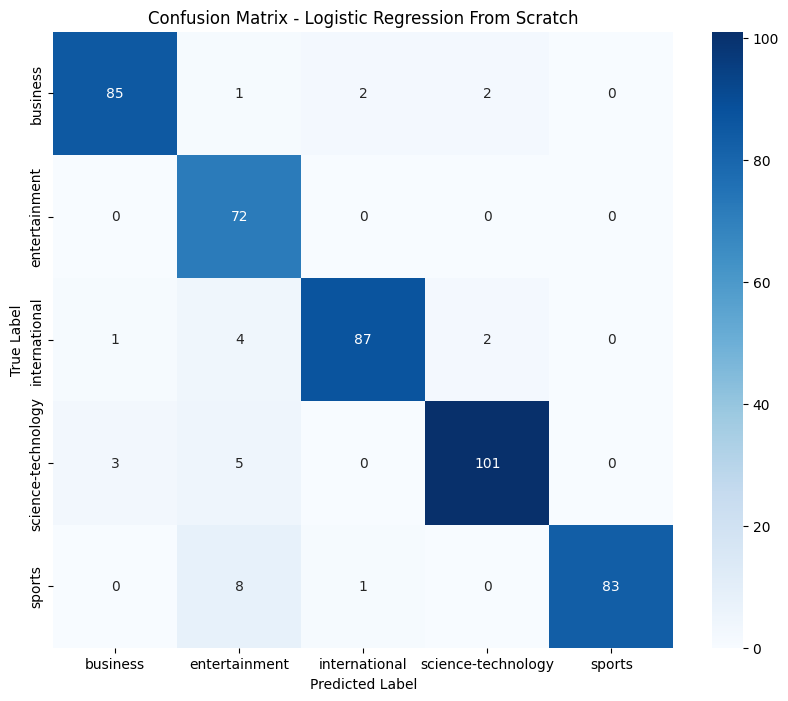

In [11]:

# Train logistic regression
model = CustomLogisticRegression(learning_rate=0.1, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print metrics
metrics, classes = calculate_classification_report(y_test, y_pred)
print_classification_report(metrics, classes)

# Create and plot confusion matrix
cm = create_confusion_matrix(y_test, y_pred, classes)


> **Note:** that accuracy over here should not matter that much, on a good day (good seed) it even scored 95%. Its all a matter of which classes got trained more and which got less. In my observation, for this model business is a class that is well distinguished so it will flourish well even without more articles, however a good pattern i have observed: For a same class, the difference in weights between no #1 feature (feature with most weight) and the feature with 10th most weight (overall) lets call it delta. The greater the delta is the better this category performs since model has distinguished weights that will help it easily decide by big marginns. This is purely an observation which may or may not be true.

### Sanity Check

In [12]:

# Get and print top features
feature_names = np.array(tfidf.get_feature_names_out())
top_features = get_top_features(model, feature_names)
print_top_features(top_features)


Top features for each category using Logistic Regression from Scratch:

Category: business
- روپے: 0.8116
- ڈالر: 0.6405
- قیمت: 0.4588
- ارب: 0.4481
- پیسے: 0.4222
- سونے: 0.4122
- ایف: 0.3915
- ہزار: 0.3807
- پوائنٹس: 0.3345
- ٹیکس: 0.3276

Category: entertainment
- اداکارہ: 0.6851
- خان: 0.6214
- فلم: 0.5853
- اداکار: 0.4381
- شادی: 0.4376
- بالی: 0.3542
- سلمان خان: 0.3161
- شاہ رخ: 0.2833
- سلمان: 0.2759
- رخ: 0.2723

Category: international
- ٹرمپ: 0.8245
- اسرائیلی: 0.5221
- امریکی: 0.5137
- ڈونلڈ: 0.4795
- ڈونلڈ ٹرمپ: 0.4778
- صدر: 0.3760
- صدارتی: 0.3276
- ہیرس: 0.3020
- اسرائیل: 0.2977
- ووٹ: 0.2889

Category: science-technology
- فیچر: 0.3816
- صارفین: 0.3714
- اے: 0.3533
- ایپ: 0.3200
- استعمال: 0.3035
- گوگل: 0.2997
- آئی: 0.2984
- کمپنی: 0.2973
- اے آئی: 0.2959
- فون: 0.2721

Category: sports
- ٹیم: 0.6764
- کرکٹ: 0.6089
- سی: 0.5850
- پاکستان: 0.5521
- میچ: 0.5172
- آسٹریلیا: 0.4788
- رنز: 0.4761
- محمد: 0.3686
- ٹرافی: 0.3551
- سیریز: 0.3512
